## E-commerce Product Delivery Prediction

In [1]:
## Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from scipy import stats

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report

import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

## Data Preparation

In [2]:
# Loading the DataSet
df = pd.read_csv('E_Commerce.csv')

In [3]:
# Display the Top columns of the Dataset
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached_on_Time_YN  
0                44           1233                   1  
1                59           3088                   1  
2                48           3374                   1  
3                10           1177                   1  
4                46           2484                   1

In [4]:
# Display the shape of the dataset
df.shape

(10999, 12)

In [5]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time_YN   10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


It gives us the information about the dataset as it shows that there are two types of data( one is int and another is object) with that there is information about how many are their of int and object types od data present in this dataset. 

In [6]:
# Dsiplay that their is any null values in the dataset
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_Time_YN     0
dtype: int64

In [7]:
#Get the Summary statistics for numerical variables
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached_on_Time_YN  
count     10999.000000      10999.000000   10999.000000        10999.000000  
mean          3.567597         13.373216    3634.016729            0.596691  
std           1.522860         16.205527    1635.377251            0.490584  
min           2.000000          1.000000    1001.000000            0.000000  
25%           3.000000          4.000000    1839.500000            0.000000  
50%           3.000000          7.000000    4149.000000            1.000000  
75%           4.000000         10.000000    5050.000000            1.000000  
max          10.000000         65.000000    7846.000000            1.000000

In [8]:
#Get the Summary statistics for numerical variables
df.describe().T

count         mean          std     min     25%  \
ID                   10999.0  5500.000000  3175.282140     1.0  2750.5   
Customer_care_calls  10999.0     4.054459     1.141490     2.0     3.0   
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0   
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   
Prior_purchases      10999.0     3.567597     1.522860     2.0     3.0   
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0   
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5   
Reached_on_Time_YN   10999.0     0.596691     0.490584     0.0     0.0   

                        50%     75%      max  
ID                   5500.0  8249.5  10999.0  
Customer_care_calls     4.0     5.0      7.0  
Customer_rating         3.0     4.0      5.0  
Cost_of_the_Product   214.0   251.0    310.0  
Prior_purchases         3.0     4.0     10.0  
Discount_offered        7.0    10.0     65.0  
Weight_in_gms        4149.0  5050.0   7846.0  
Reached_on_Time_YN      1.0     1.0      1.0

In [9]:
#Get the Summary statistics for Categorical variables
df.describe(include = 'object')

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

The summary statistics for the Categorical Columns in the Dataset are as follows:

Warehouse_Block: There are total 10999 entries which has 5 unique counts which tells you about the each blocks.
Mode_of_Shipment: There are total 10999 entries which has 3 unique counts which tells you about the each thorugh which transport the shipment is being deliverd.
Product_importance:There are total 10999 entries which has 3 unique counts which tells you about the priority of the shipment. 
Gender:There are total 10999 entries which has 2 unique counts which tells you about the gender and frequency tells about maximum which value is an occuring has it shows the 5545 means the Female is 5545 in the columns of gender in the dataset. . 

In [10]:
# It tells you about any duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

In [11]:
# Name of the Columns given in the Dataset
feature = df.columns

In [12]:
# Filter out the Categorical features from the dataset 
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

## Filter out the numerical features from the dataset
Numerical_feature = df.select_dtypes(include=['int64']).columns
print(Numerical_feature)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_Time_YN'],
      dtype='object')


Here we are filtering out the data in two parts:

One is the Numerical variable which contain 8 columns which are ID,Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms,Reached_on_Time_YN
second is the Categorical Variables contain 4 Columns which are Warehouse_block,Mode_of_Shipment,Product_importance,Gender.

In [13]:
# Apply Label Encoding to the 'Warehouse_block' column
WB = LabelEncoder()
# Transform categorical 'Warehouse_block' data into numerical labels
df['Warehouse_block'] = WB.fit_transform(df['Warehouse_block'])

# Apply Label Encoding to the 'Mode_of_Shipment' column
MoS = LabelEncoder()
# Transform categorical 'Mode_of_Shipment' data into numerical labels
df['Mode_of_Shipment'] = MoS.fit_transform(df['Mode_of_Shipment'])

# Apply Label Encoding to the 'Product_importance' column
Pi = LabelEncoder()
# Transform categorical 'Product_importance' data into numerical labels
df['Product_importance'] = Pi.fit_transform(df['Product_importance'])

# Apply Label Encoding to the 'Gender' column
Gdr = LabelEncoder()
# Transform categorical 'Gender' data into numerical labels
df['Gender'] = Gdr.fit_transform(df['Gender'])

Here we are converting the categorical data into numerical data because it help us to make Machine learning algorithms like decision trees, random forests easier as it require numerical data, so categorical variables must be converted and Categorical variables which can’t be directly manipulated mathematically, making transformations difficult So,Using the Label Encoder helps us to assigns unique integers to categories which help to aiding algorithm performance and also by Converting categorical to numerical data  it enhances model interpretability and feature importance analysis.

In [14]:
# Print the number of records with the Reached_on_Time_YN value 0 in the 'Reached_on_Time_YN' column
print('Products reached on Time:',(df.Reached_on_Time_YN == 0).sum())
# Print the number of records with the Reached_on_Time_YN value 1 in the 'Reached_on_Time_YN' column
print('Products Not reach on Time:',(df.Reached_on_Time_YN == 1).sum())

Products reached on Time: 4436
Products Not reach on Time: 6563


In [15]:
# Count of Warehouse Blocks
df['Warehouse_block'].value_counts()

Warehouse_block
4    3666
3    1834
0    1833
1    1833
2    1833
Name: count, dtype: int64

In [16]:
# Count of Each Mode of Shipment
df['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
2    7462
0    1777
1    1760
Name: count, dtype: int64

In [17]:
# Product Importance Distribution
df['Product_importance'].value_counts()

Product_importance
1    5297
2    4754
0     948
Name: count, dtype: int64

In [18]:
# Gender Value Counts
df['Gender'].value_counts()

Gender
0    5545
1    5454
Name: count, dtype: int64

In [19]:
# Creating the new Features 

df['Total_Spent'] = df['Cost_of_the_Product'] * df['Prior_purchases']
df['Customer_Loyalty'] = df['Prior_purchases'] / df['Customer_care_calls']
df['Weight_Cost_Ratio'] = df['Weight_in_gms'] / df['Cost_of_the_Product']

Total_Spent = Cost_of_the_Product represents the cost of a single product and Prior_purchases represents the number of prior purchases made by a customer, So the product of these two variables would give us the total spent of the customer on that product. 

Customer_Loyalty = It tells you that how many priorpurchase the product and call on the customer care to know about their products through this we can identify loyal customers, understand their needs, and tailor your marketing strategies to retain and grow their business.

Weight_Cost_Ratio = This feature can help identify products with high weight-to-cost ratios.

In [20]:
df.head()

ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                    4   
1   2                4                 0                    4   
2   3                0                 0                    2   
3   4                1                 0                    3   
4   5                2                 0                    2   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0                2                  177                3                   1   
1                5                  216                2                   1   
2                2                  183                4                   1   
3                3                  176                4                   2   
4                2                  184                3                   2   

   Gender  Discount_offered  Weight_in_gms  Reached_on_Time_YN  Total_Spent  \
0       0                44           1233                   1          531   
1       1                59           3088                   1          432   
2       1                48           3374                   1          732   
3       1                10           1177                   1          704   
4       0                46           2484                   1          552   

   Customer_Loyalty  Weight_Cost_Ratio  
0          0.750000           6.966102  
1          0.500000          14.296296  
2          2.000000          18.437158  
3          1.333333           6.687500  
4          1.500000          13.500000

## Data Visualization

In [21]:
# Creating a function for Creating the individual representation of the features
def E_Comm(df, feature):
    print(df[feature].describe())
# For Visual Representation
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

count    10999.000000
mean         2.333394
std          1.490726
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Warehouse_block, dtype: float64


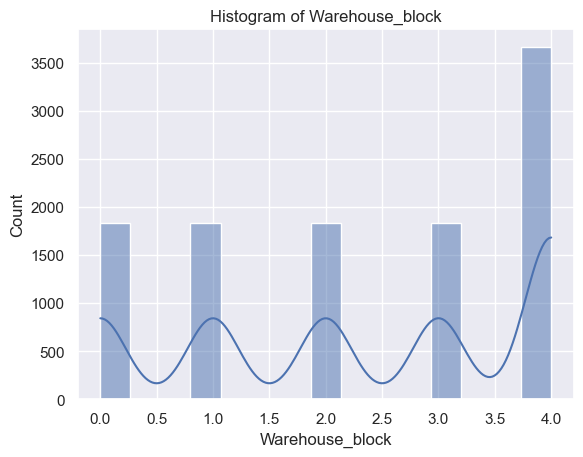

count    10999.000000
mean         1.516865
std          0.756894
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Mode_of_Shipment, dtype: float64


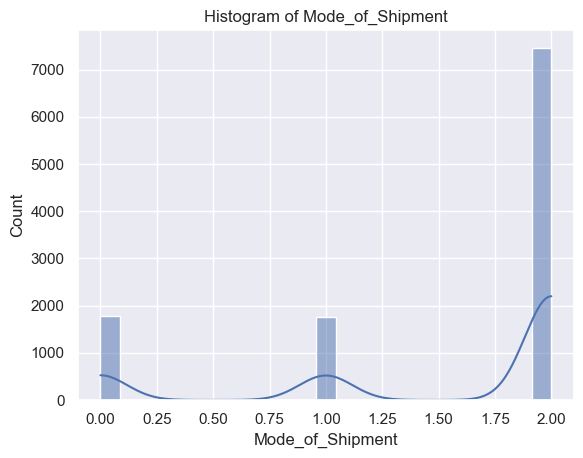

count    10999.000000
mean         1.346031
std          0.631434
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: Product_importance, dtype: float64


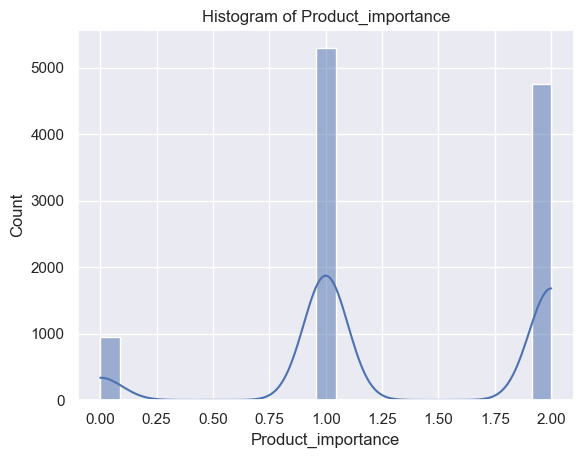

count    10999.000000
mean         0.495863
std          0.500006
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64


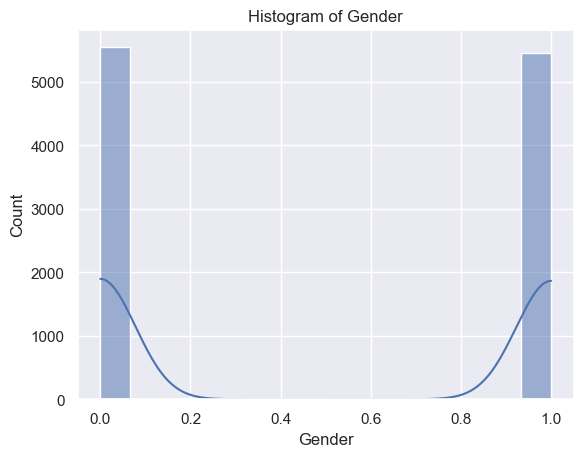

count    10999.000000
mean         2.990545
std          1.413603
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_rating, dtype: float64


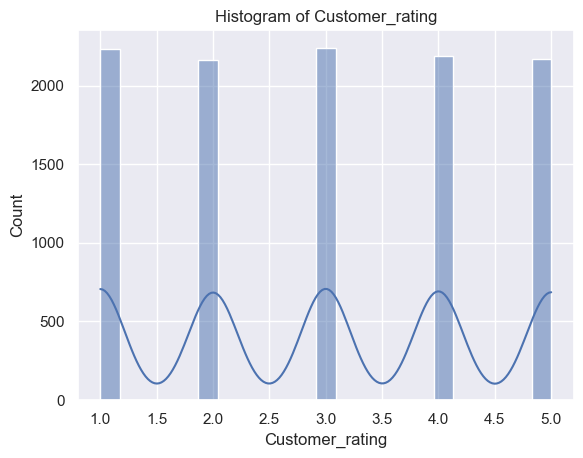

count    10999.00000
mean      5500.00000
std       3175.28214
min          1.00000
25%       2750.50000
50%       5500.00000
75%       8249.50000
max      10999.00000
Name: ID, dtype: float64


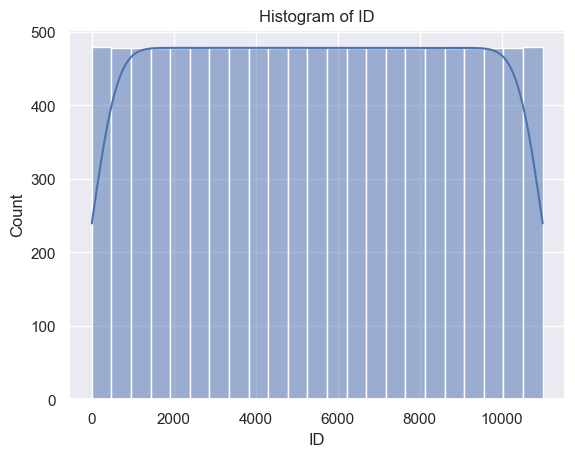

count    10999.000000
mean         4.054459
std          1.141490
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: Customer_care_calls, dtype: float64


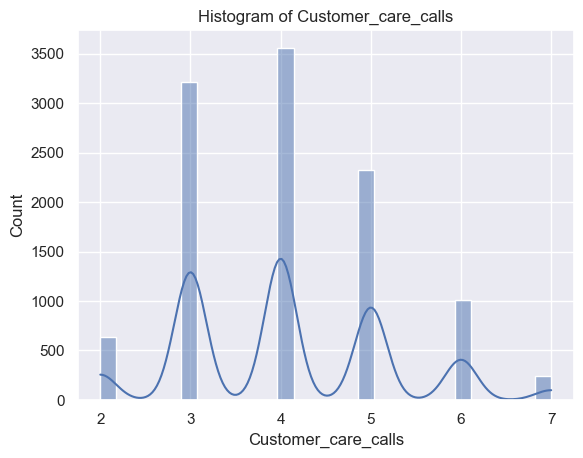

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64


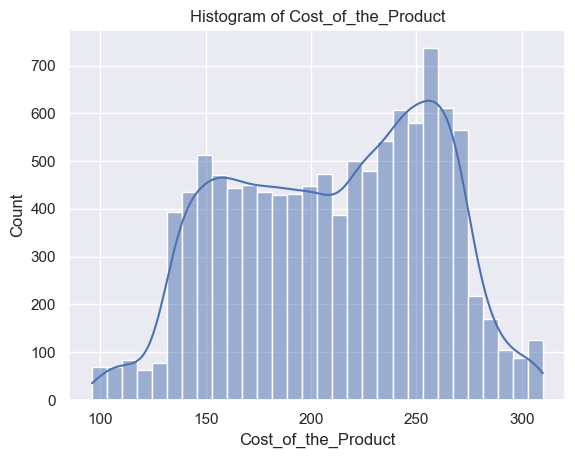

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64


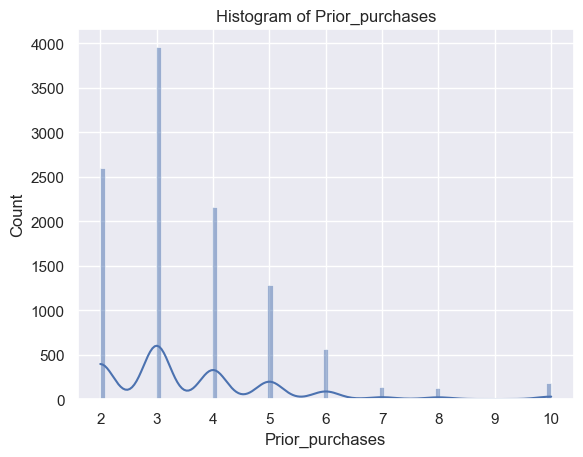

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64


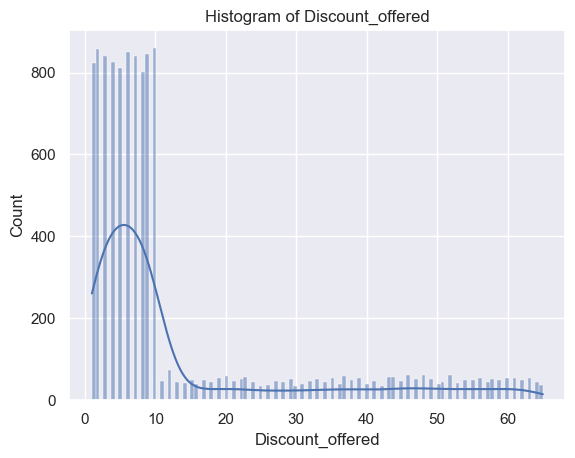

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64


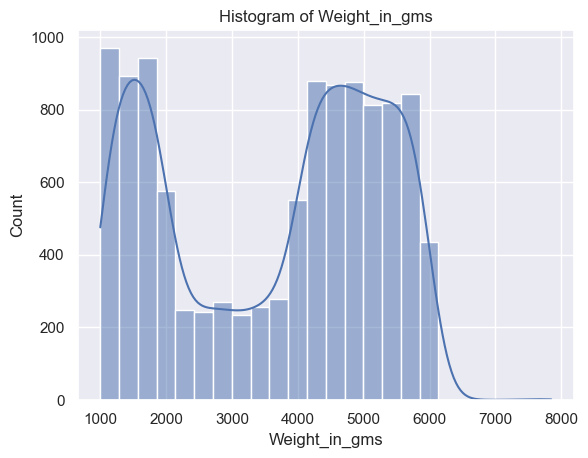

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Reached_on_Time_YN, dtype: float64


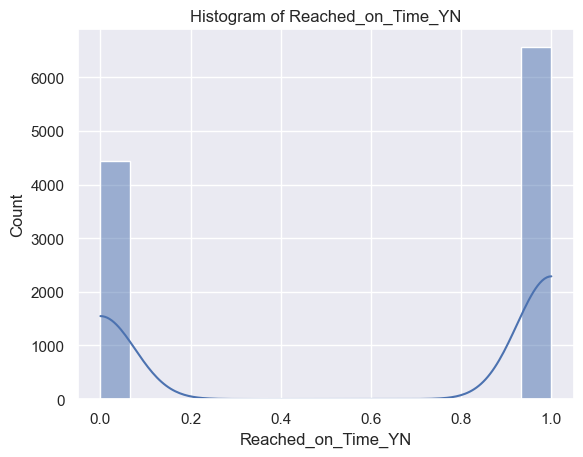

In [22]:
# Creating the Histploot for the information about the features
E_Comm(df,'Warehouse_block')
E_Comm(df,'Mode_of_Shipment')
E_Comm(df,'Product_importance')
E_Comm(df,'Gender')
E_Comm(df,'Customer_rating')
E_Comm(df,'ID')
E_Comm(df,'Customer_care_calls')
E_Comm(df,'Cost_of_the_Product')
E_Comm(df,'Prior_purchases')
E_Comm(df,'Discount_offered')
E_Comm(df,'Weight_in_gms')
E_Comm(df,'Reached_on_Time_YN')

Text(0.5, 1.0, 'Comparison of On-Time Delivery Performance by Warehouse Block')

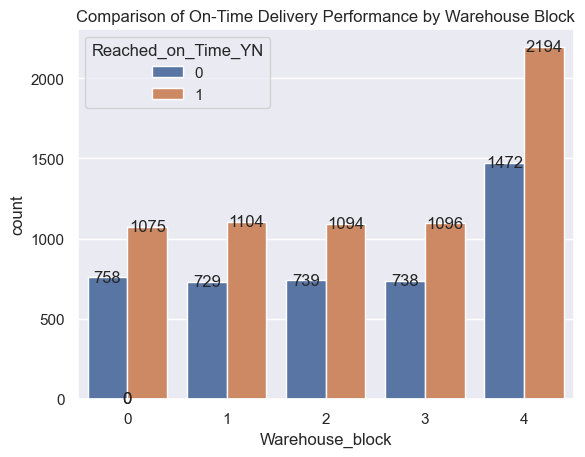

In [23]:
# Visual representation Warehouse Block with the Reache on time 
WareHouse_Block = sns.countplot(data = df, x ='Warehouse_block' ,hue= 'Reached_on_Time_YN')
# add counts to the bars
for p in WareHouse_Block.patches:
    WareHouse_Block.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
#Set Title
WareHouse_Block.set_title('Comparison of On-Time Delivery Performance by Warehouse Block')

Text(0.5, 1.0, 'Comparison of On-Time Delivery Performance by Mode of Shipment')

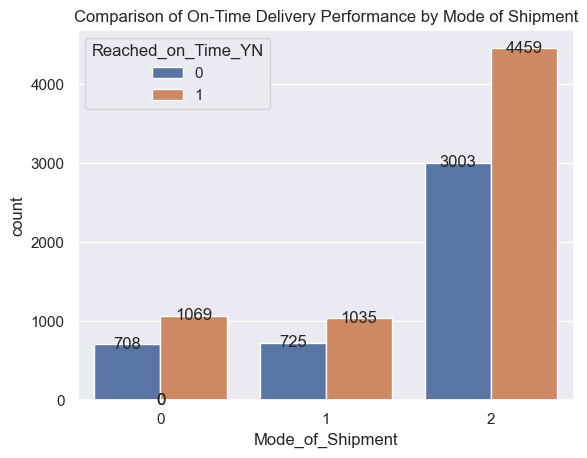

In [24]:
# Visual representation Mode of Shipment with the Reach on time
Mode_of_Shipment = sns.countplot(data = df, x ='Mode_of_Shipment' ,hue= 'Reached_on_Time_YN')

# add counts to the bars
for p in Mode_of_Shipment.patches:
    Mode_of_Shipment.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
#Set Title
Mode_of_Shipment.set_title('Comparison of On-Time Delivery Performance by Mode of Shipment')

It shows the from which Mode of shipment is being used in which majority of shipment is shipped via Ship, then Flight and then Road and by comparing with the data which shipment is reached on time and which is not.  

Text(0.5, 1.0, 'Count of On-Time Delivery Performance by Product Importance')

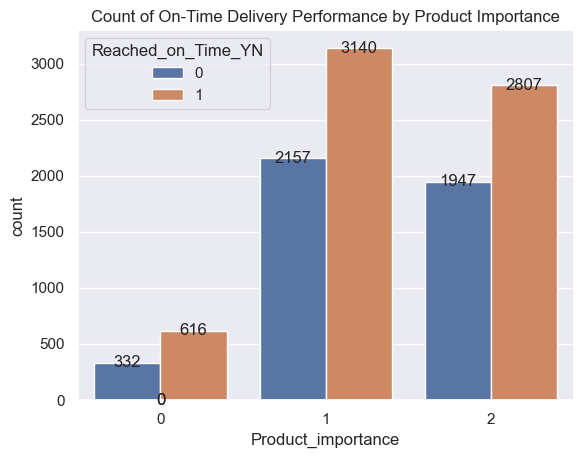

In [25]:
# Visual representation Product Importance with the Reach on time
Product_Importance = sns.countplot(data = df, x ='Product_importance' ,hue= 'Reached_on_Time_YN')

# add counts to the bars
for p in Product_Importance.patches:
    Product_Importance.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
#Set Title
Product_Importance.set_title('Count of On-Time Delivery Performance by Product Importance')

It shows about the Product Importance as compare with the Timely Delivery as we see that Majority of shipments are the Low Priority shipment which indicates as 1 and Other Two 0,2 are the High and Medium Importance.

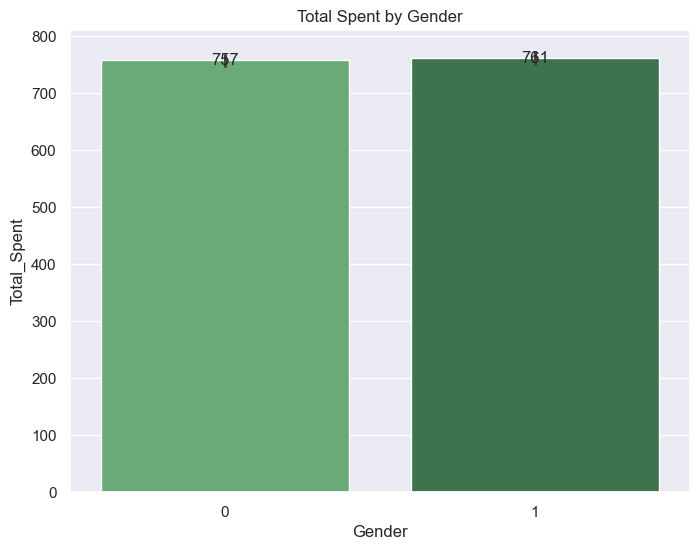

In [26]:
plt.figure(figsize=(8, 6))
Total_Spent = sns.barplot(x="Gender", y="Total_Spent", palette='Greens_d',data=df)
plt.title("Total Spent by Gender")
# add counts to the bars
for p in Total_Spent.patches:
    Total_Spent.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
plt.show()

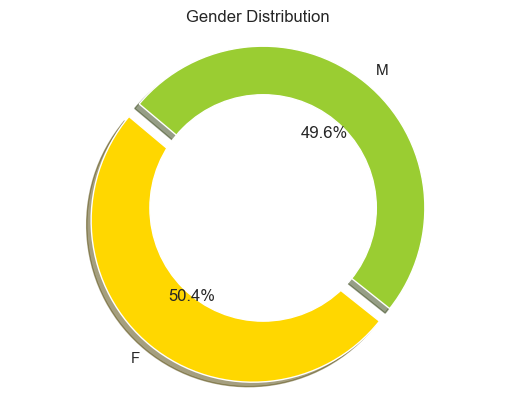

In [27]:
# Data for the pie chart
sizes = [df['Gender'].value_counts()[0], df['Gender'].value_counts()[1]]
labels = ['F', 'M']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.title('Gender Distribution')

plt.show()

It shows that which Gender is doing more purchase which is compare with Average Total Spent and you see that there is a little more Female participants compare with the Male Participants and the Distribution of Gender.

Text(0.5, 1.0, 'Count of On-Time Deliveries by Customer Care Calls')

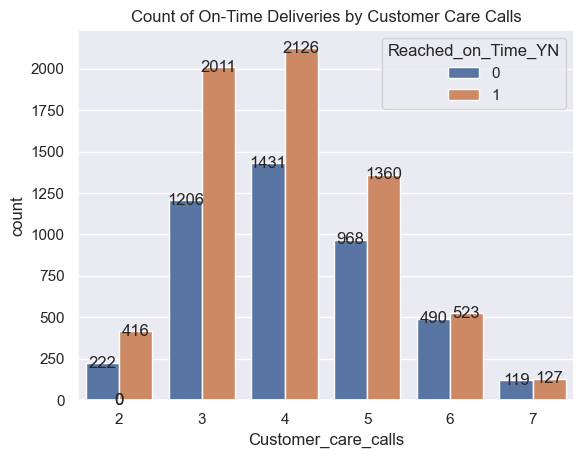

In [28]:
# Visual representation Customer_care_calls with the Reach on time
CCC = sns.countplot(data = df, x ='Customer_care_calls' ,hue= 'Reached_on_Time_YN')

# add counts to the bars
for p in CCC.patches:
    CCC.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
#Set Title
CCC.set_title('Count of On-Time Deliveries by Customer Care Calls')

It shows the data that how may people enquired about their shipment and which has reached on time and which are not.

Text(0.5, 1.0, 'Count of On-Time Deliveries by Customer Rating')

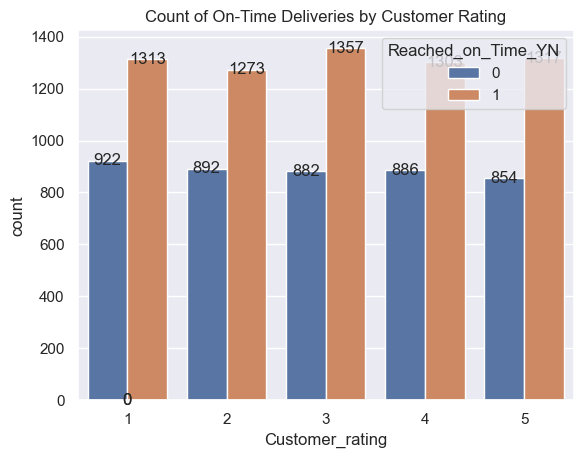

In [29]:
# Visual representation Customer Rating with the Reach on time
CR = sns.countplot(data = df, x ='Customer_rating' ,hue= 'Reached_on_Time_YN')

# add counts to the bars
for p in CR.patches:
    CR.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), 
            f'{p.get_height():.0f}', ha='center', va='center', size=12)
# Set Titles
CR.set_title('Count of On-Time Deliveries by Customer Rating')

It shows about the customer rating compare with the on time delivery as we see the 1 is the worst and 5 is the excellent rating

Text(0.5, 0.98, 'Impact of Weight on On-Time Delivery')

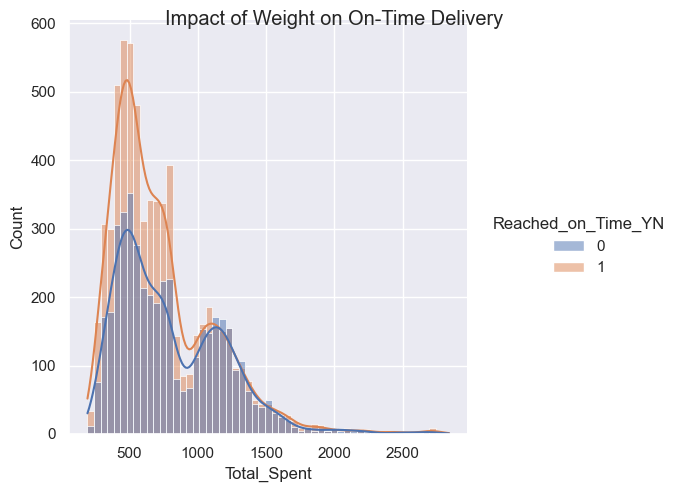

In [30]:
# Visual representation Total_Spent
WiG = sns.displot(data = df, x ='Total_Spent' ,hue= 'Reached_on_Time_YN', kde = True)
# Set Title
plt.suptitle('Impact of Weight on On-Time Delivery')

Text(0.5, 0.98, 'Distribution of the Product Cost')

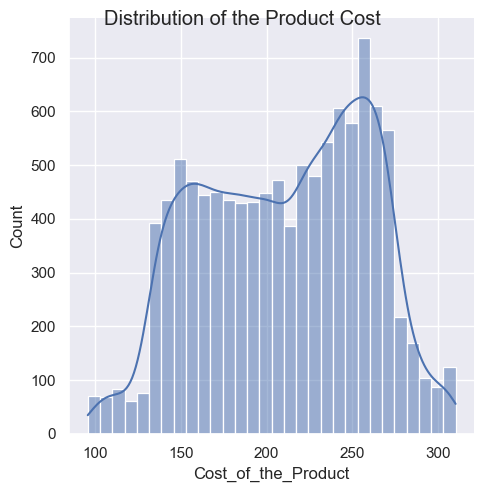

In [31]:
# Visual representation Cost of the Product
COP = sns.displot(data = df, x ='Cost_of_the_Product', kde = True)
# Set Title
plt.suptitle('Distribution of the Product Cost')

There are the 11000 Products which tells us about the Cost of the product and this displot shows the Distribution of the data according to the cost of the product as there are so many products can't able to label it but we see that most of the purchase are made in between 250-270. So, we have to focus on more on those orders.

Text(0.5, 0.98, 'Impact of Discount Offered on On-Time Delivery')

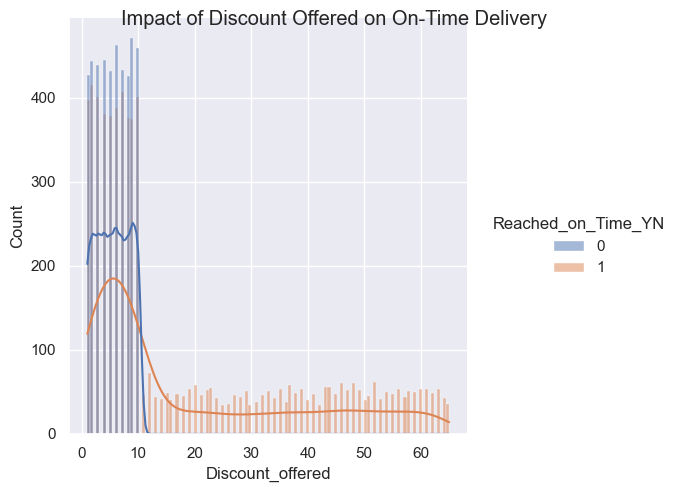

In [32]:
# Visual representation Discount Offered
DO = sns.displot(data = df, x ='Discount_offered',hue= 'Reached_on_Time_YN', kde = True)
# Set Title
plt.suptitle('Impact of Discount Offered on On-Time Delivery')

There are the 11000 Products which tells us about the Discount offered and this displot shows the Distribution of the data according to the Discount offered as there are so many products can't able to label it but we see that most of the Discount offerd are made in between 10-11 percent

Text(0.5, 0.98, 'Impact of Weight on On-Time Delivery')

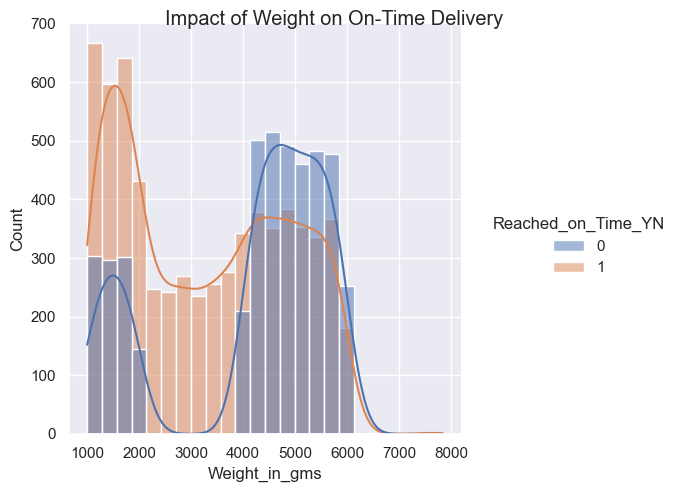

In [33]:
# Visual representation Weight in Grams
WiG = sns.displot(data = df, x ='Weight_in_gms' ,hue= 'Reached_on_Time_YN', kde = True)
# Set Title
plt.suptitle('Impact of Weight on On-Time Delivery')

It compares the weight distribution of products that were delivered on time versus those that were not. The x-axis represents the weight in grams, ranging from 500 to 8000 grams, while the y-axis shows the count of packages. Two distinct peaks indicate common weight ranges for both on-time and delayed deliveries, highlighting the relationship between products weight and delivery performance.

## Outlier Detection

<Axes: >

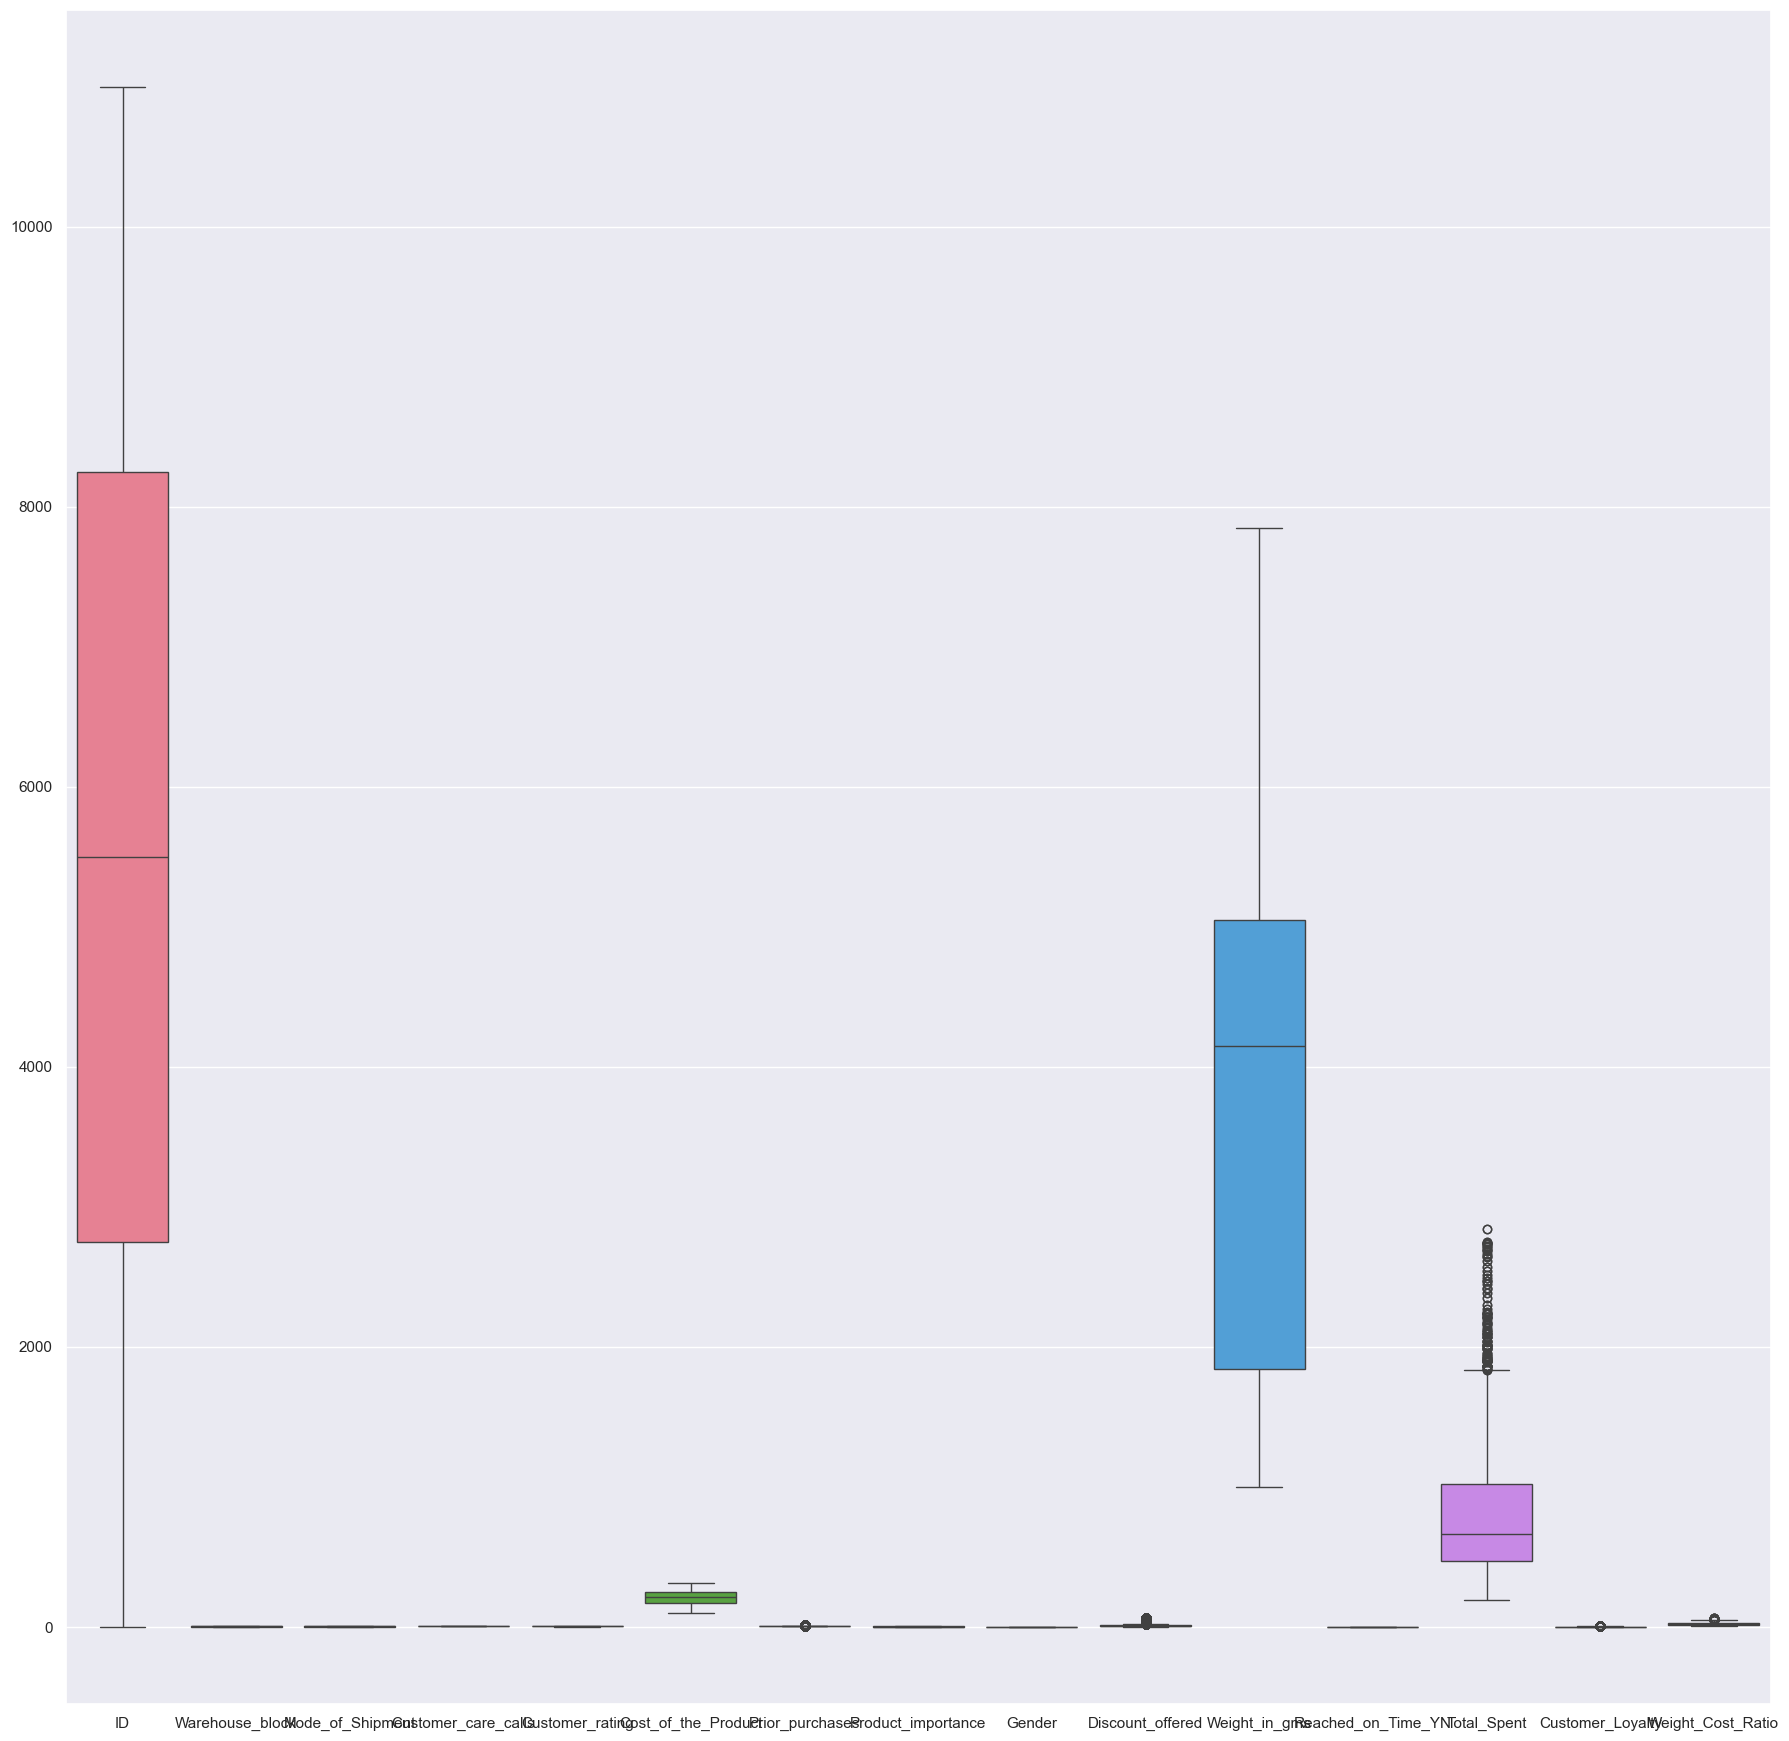

In [34]:
# Checking for any Outliers
plt.figure(figsize=(22,22))
sns.boxplot(data=df)

It shows the Columns that contains the outliers as we see there are 5 variables that have the outliers which are Prior_Purchase, Discount_offered,Total Spent,Customer Loyalty,Weight Cost Ratio.

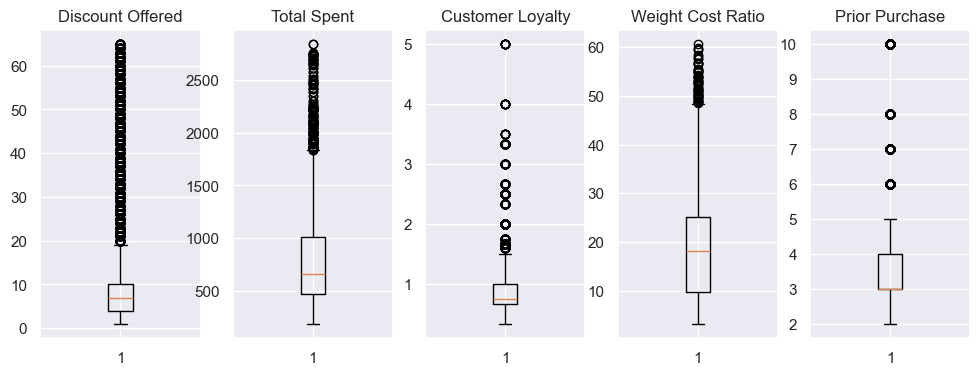

In [35]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 5, figsize=(12, 4))

# Create boxplots for all the outliers
ax[0].boxplot(df['Discount_offered'])
ax[1].boxplot(df['Total_Spent'])
ax[2].boxplot(df['Customer_Loyalty'])
ax[3].boxplot(df['Weight_Cost_Ratio'])
ax[4].boxplot(df['Prior_purchases'])

# Set titles and labels
ax[0].set_title('Discount Offered')
ax[1].set_title('Total Spent')
ax[2].set_title('Customer Loyalty')
ax[3].set_title('Weight Cost Ratio')
ax[4].set_title('Prior Purchase')

# Show the plot
plt.show()


The plots shows the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values, providing a clear visualof the Discount_offered feature. It Shows the outliers and help to understand the spread and symmetry of the given columns of data.

## Removing the Outliers

In [36]:
# Removing the outliers in the Discount_Offered Column with the help of the Winsorize
df['Discount_offered'] = stats.mstats.winsorize(df['Discount_offered'].values, [0.21,0.21])

In particular, it sets the values below the 21st percentile and above the 79th percentile (i.e., 1 - 0.21) to the values at the 21st and 79th percentiles, respectively. This is a common technique to reduce the effect of outliers in a dataset.

The resulting values are then assigned back to the Discount_offered column of the original DataFrame df.

In [37]:
# Removing the outliers in the Prior_purchase Column with the help of the Winsorize
df['Prior_purchases'] = stats.mstats.winsorize(df['Prior_purchases'].values, [0.10,0.10])

In particular, it sets the values below the 10th percentile and above the 90th percentile (i.e., 1 - 0.10) to the values at the 10th and 90th percentiles, respectively. This is a common technique to reduce the effect of outliers in a dataset.

The resulting values are then assigned back to the Prior_purchases column of the original DataFrame df.

In [38]:
# Removing the outliers in the Total_Spent Column with the help of the Winsorize
df['Total_Spent'] = stats.mstats.winsorize(df['Total_Spent'].values, [0.02,0.02])

In particular, it sets the values below the 2nd percentile and above the 98th percentile (i.e., 1 - 0.02) to the values at the 2nd and 98th percentiles, respectively. This is a common technique to reduce the effect of outliers in a dataset.

The resulting values are then assigned back to the Total_Spent column of the original DataFrame df.

In [39]:
# Removing the outliers in the Customer_Loyalty Column with the help of the Winsorize
df['Customer_Loyalty'] = stats.mstats.winsorize(df['Customer_Loyalty'].values, [0.08,0.08])

In particular, it sets the values below the 8th percentile and above the 92nd percentile (i.e., 1 - 0.08) to the values at the 8th and 92nd percentiles, respectively. This is a common technique to reduce the effect of outliers in a dataset.

The resulting values are then assigned back to the Customer_Loyalty column of the original DataFrame df.

In [40]:
# Removing the outliers in the Weight_Cost_Ratio Column with the help of the Winsorize
df['Weight_Cost_Ratio'] = stats.mstats.winsorize(df['Weight_Cost_Ratio'].values, [0.05, 0.05])

In particular, it sets the values below the 5th percentile and above the 95th percentile (i.e., 1 - 0.05) to the values at the 5th and 95th percentiles, respectively. This is a common technique to reduce the effect of outliers in a dataset.

The resulting values are then assigned back to the Weight_cost_ratio column of the original DataFrame df.

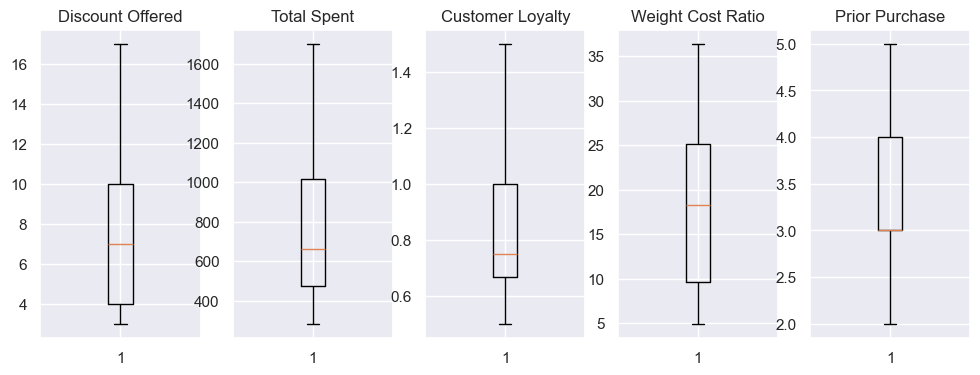

In [41]:
# Create a figure and axis object
fig, ax = plt.subplots(1, 5, figsize=(12, 4))

# Create boxplots
ax[0].boxplot(df['Discount_offered'])
ax[1].boxplot(df['Total_Spent'])
ax[2].boxplot(df['Customer_Loyalty'])
ax[3].boxplot(df['Weight_Cost_Ratio'])
ax[4].boxplot(df['Prior_purchases'])

# Set titles and labels
ax[0].set_title('Discount Offered')
ax[1].set_title('Total Spent')
ax[2].set_title('Customer Loyalty')
ax[3].set_title('Weight Cost Ratio')
ax[4].set_title('Prior Purchase')

# Show the plot
plt.show()

The Outliers has been removed form these features with the help of the winsorize method

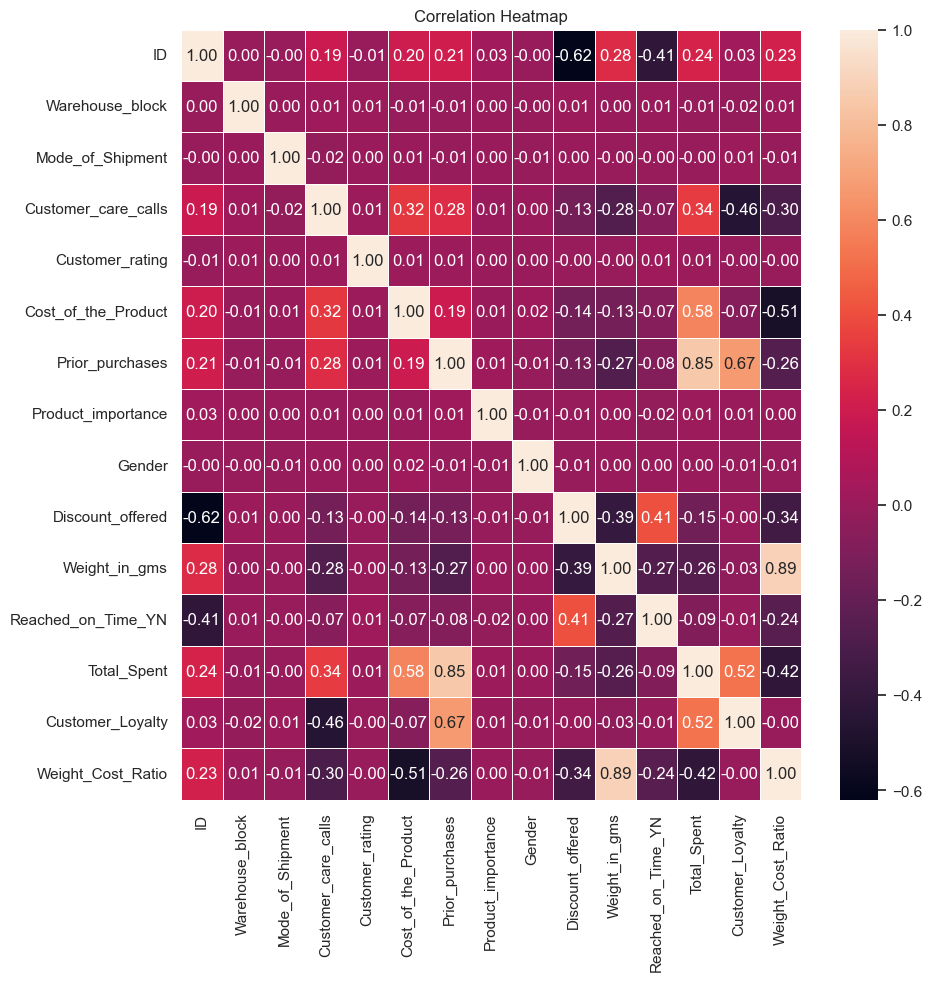

In [42]:
# Creating the Correlation Heatmap 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This correlation heatmap provides insights into the relationships between different variables in the dataset. By examining the colors, we can quickly identify which variables have strong positive correlations (dark red) or strong negative correlations (dark blue). For example, there is a “Discount_offered” which has a strong negative correlation with “Reached_on_Time_YN,” it suggests that higher discounts might be associated with late deliveries. This visualization helps in understanding how different factors interact with each other, which can be crucial for feature selection and improving model performance.

In [43]:
# Splitting the Dependent and Independent Variables 
X = df.drop(['Reached_on_Time_YN','Mode_of_Shipment','Gender','Warehouse_block','Customer_Loyalty','Customer_rating'], axis = 1)
y = df['Reached_on_Time_YN']

Training set shape: (7699, 14) (7699,)
Testing set shape: (2200, 14) (2200,)
Validation set shape: (1100, 14) (1100,)
Training set target variable distribution:
Reached_on_Time_YN
1    4598
0    3101
Name: count, dtype: int64
Testing set target variable distribution:
Reached_on_Time_YN
1    1315
0     885
Name: count, dtype: int64
Validation set target variable distribution:
Reached_on_Time_YN
1    650
0    450
Name: count, dtype: int64
Training set missing values:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Total_Spent            0
Customer_Loyalty       0
Weight_Cost_Ratio      0
dtype: int64
Testing set missing values:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Pr

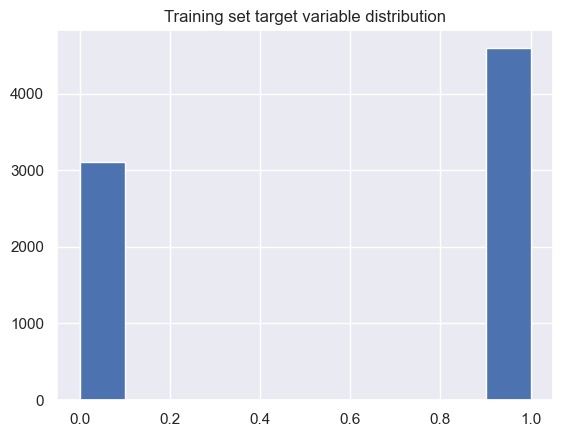

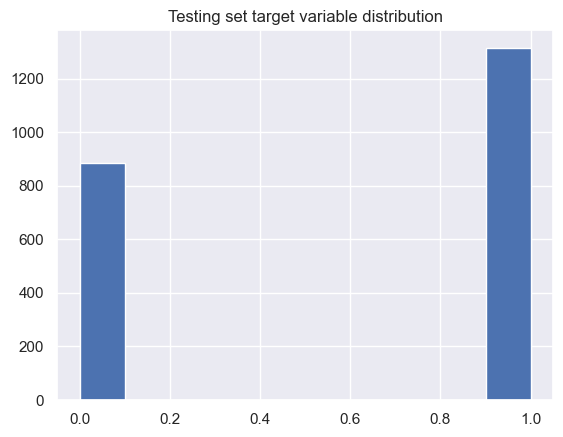

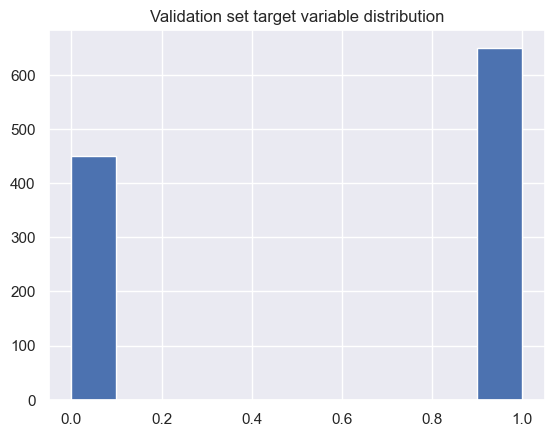

In [44]:
# Split the dataset into training, testing, and validation sets
from fast_ml.model_development import train_valid_test_split
X_train,y_train,X_valid,y_valid,X_test,y_test = train_valid_test_split(df, target = 'Reached_on_Time_YN',train_size = 0.7,valid_size = 0.1,test_size = 0.2,random_state = 25)

# Validate the data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)

print("Training set target variable distribution:")
print(y_train.value_counts())

print("Testing set target variable distribution:")
print(y_test.value_counts())

print("Validation set target variable distribution:")
print(y_valid.value_counts())

print("Training set missing values:")
print(X_train.isnull().sum())

print("Testing set missing values:")
print(X_test.isnull().sum())

print("Validation set missing values:")
print(X_valid.isnull().sum())

print("Training set data types:")
print(X_train.dtypes)

print("Testing set data types:")
print(X_test.dtypes)

print("Validation set data types:")
print(X_valid.dtypes)

plt.hist(y_train, bins=10)
plt.title("Training set target variable distribution")
plt.show()

plt.hist(y_test, bins=10)
plt.title("Testing set target variable distribution")
plt.show()

plt.hist(y_valid, bins=10)
plt.title("Validation set target variable distribution")
plt.show()

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

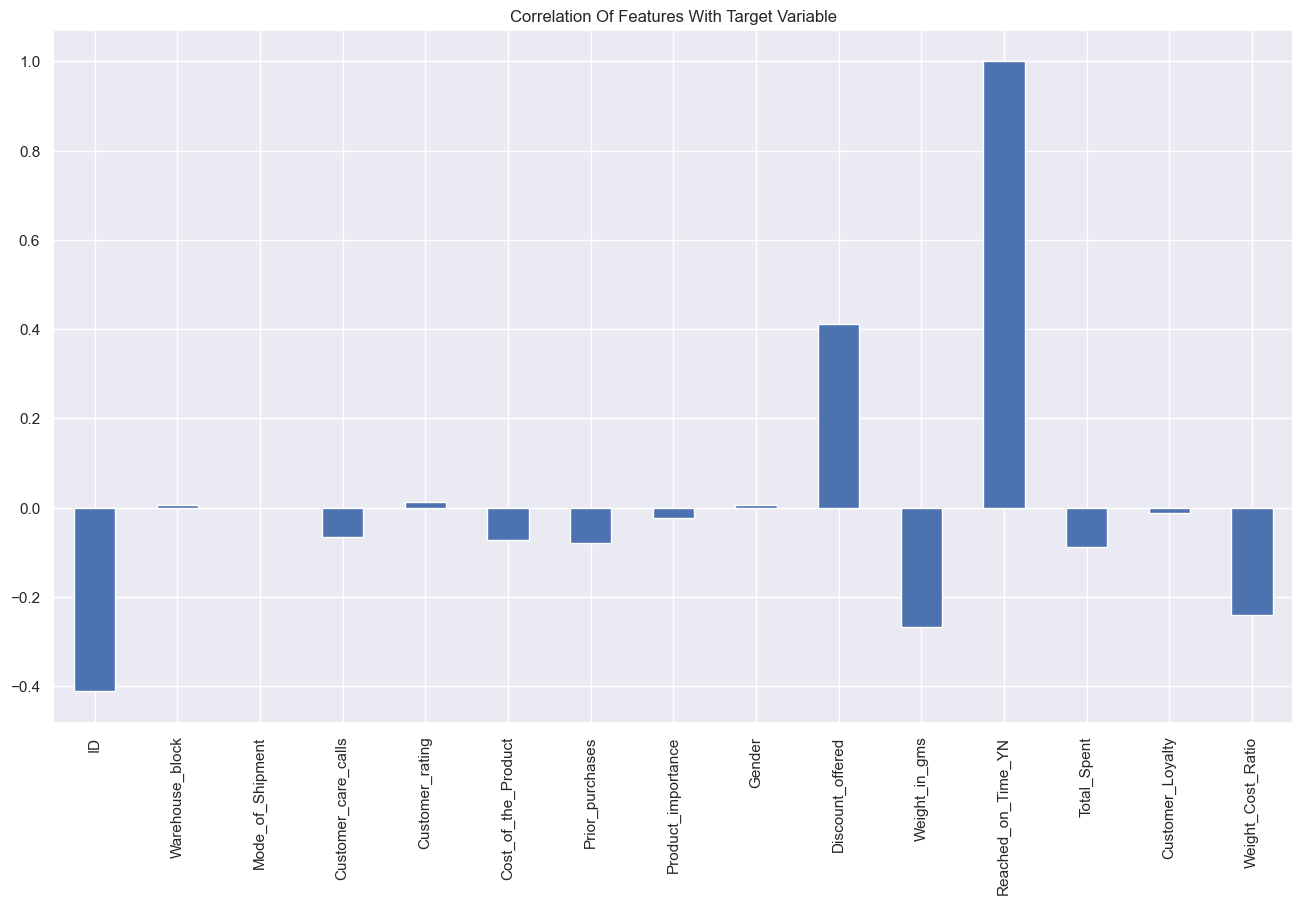

In [45]:
# Creating the Bar Plot to visulaize the feature with target variable.
x = df.corr()['Reached_on_Time_YN']
x.plot.bar(figsize=(16,9),title="Correlation Of Features With Target Variable", grid=True)

ID                     0.411822
Discount_offered       0.410599
Weight_in_gms          0.268793
Weight_Cost_Ratio      0.241237
Total_Spent            0.089250
Prior_purchases        0.079712
Cost_of_the_Product    0.073587
Customer_care_calls    0.067126
Product_importance     0.023483
dtype: float64


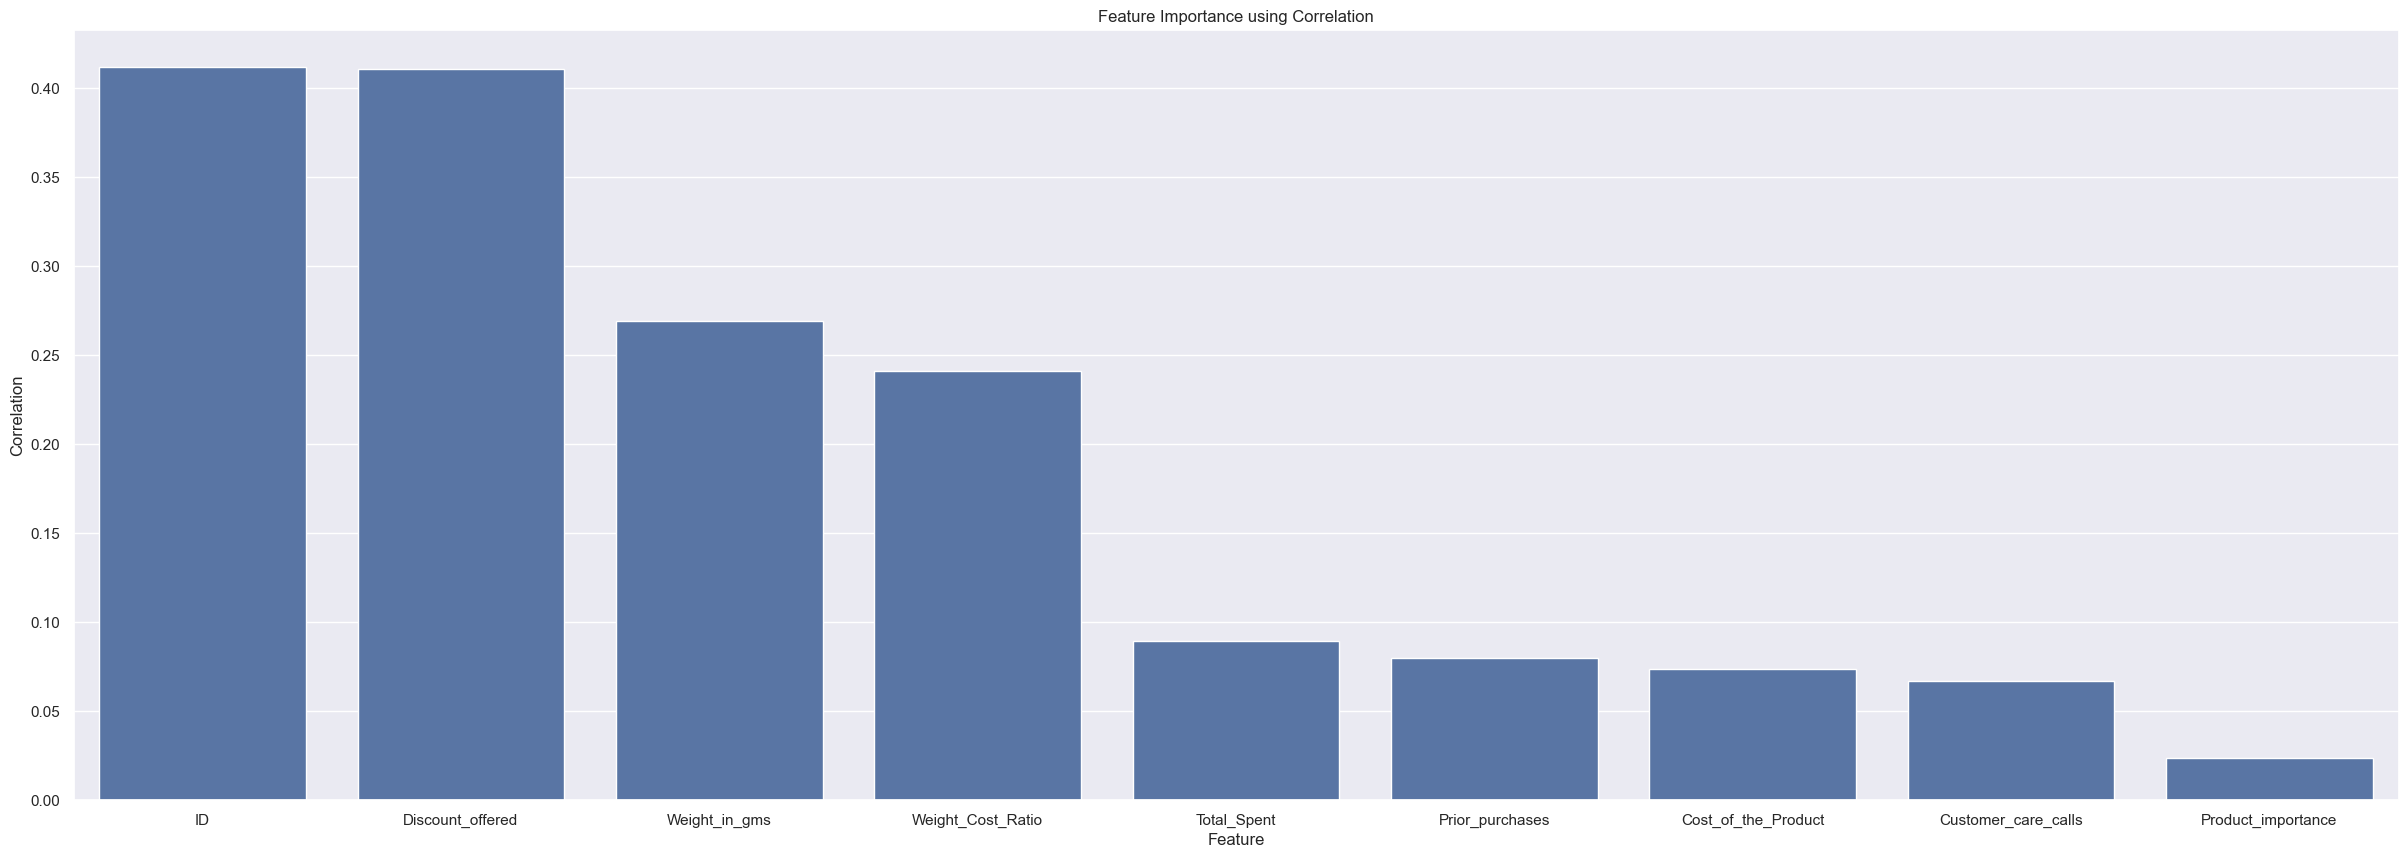

In [46]:
# Calculate the correlation between each feature and the target variable
correlation = X.corrwith(y).abs().sort_values(ascending=False)

# Print the correlation values
print(correlation)

# Plot the correlation values
plt.figure(figsize=(30, 10))
sns.barplot(x=correlation.index, y=correlation.values)
plt.title('Feature Importance using Correlation')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

## Train_Valid_Test_Split

In [47]:
# Putting a Standard Scaler on the X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL Testing and Selection

## Logistic Regression

In [97]:
Lgr = LogisticRegression(C = 6.0, penalty = 'l2', solver = 'liblinear', verbose = 0)
Lgr.fit(X_train,y_train)

LogisticRegression(C=6.0, solver='liblinear')

In [49]:
param_grids= {'penalty' : ['l1', 'l2'], 'C' : [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0], 'verbose' : [0,1,2,3,4,5], 'solver' : ['lbfgs', 'liblinear', 'newton-cholesky']}
grid_searchy = GridSearchCV(estimator=Lgr, param_grid = param_grids,scoring = 'accuracy')

In [50]:
grid_searchy.fit(X_train, y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 47.03193039427844 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 11.582971199769887 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 1.2076421173245626 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.015616351545748811 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 2.5677130989049656e-06 <= 0.0001
    2. Newton decrem

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
                         'verbose': [0, 1, 2, 3, 4, 5]},
             scoring='accuracy')

In [51]:
grid_searchy.best_params_

{'C': 6.0, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 0}

In [98]:
y_pred_LR= Lgr.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred_LR)

0.6690909090909091

In [100]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_LR))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       885
           1       0.73      0.71      0.72      1315

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200

Confusion Matrix:
[[539 346]
 [382 933]]


## Random Forest Classifier

In [101]:
rf_clf = RandomForestClassifier(criterion = 'entropy', n_estimators = 110, verbose =  0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110)

In [56]:
param_grids= {'n_estimators' : [70,80,30,90,100,110], 'criterion': ['gini','entropy'],'verbose' : [0,1,2,-1]}
grid_searcha = GridSearchCV(estimator=rf_clf, param_grid = param_grids,scoring = 'accuracy')

In [57]:
grid_searcha.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80
building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80
building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80
building tree 1 of 80
building tree 2 of 80
building tree 3 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30
building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
buildi

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 o

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89 of 110
building tree 90 of 110
building tree 91 of 110
building tree 92 of 110
building tree 93 of 110
building tree 94 of 110
building tree 95 of 110
building tree 96 of 110
building tree 97 of 110
building tree 98 of 110
building tree 99 of 110
building tree 100 of 110
building tree 1

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89 of 110
building tree 90 of 110
building tree 91 of 110
building tree 92 of 110
building tree 93 of 110
building tree 94 of 110
building tree 95

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 4

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70
building tree 1 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80
building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tree 77 of 80
building tree 78 of 80
building tree 79 of 80
building tree 80 of 80


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30
building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
buildi

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tree 89 of 90
building tree 90 of 90
building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 o

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tree 71 of 90
building tree 72 of 90
building tree 73 of 90
building tree 74 of 90
building tree 75 of 90
building tree 76 of 90
building tree 77 of 90
building tree 78 of 90
building tree 79 of 90
building tree 80 of 90
building tree 81 of 90
building tree 82 of 90
building tree 83 of 90
building tree 84 of 90
building tree 85 of 90
building tree 86 of 90
building tree 87 of 90
building tree 88 of 90
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89 of 110
building tree 90 of 110
building tree 91 of 110
building tree 92 of 110
building tree 93 of 110
building tree 94 of 110
building tree 95

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110
building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 110


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 46 of 110
building tree 47 of 110
building tree 48 of 110
building tree 49 of 110
building tree 50 of 110
building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 110
building tree 2 of 110
building tree 3 of 110
building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89 of 110
building tree 90 of 110
building tree 91 of 110
building tree 92 of 110
building tree 93 of 110
building tree 94

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 4 of 110
building tree 5 of 110
building tree 6 of 110
building tree 7 of 110
building tree 8 of 110
building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110
building tree 13 of 110
building tree 14 of 110
building tree 15 of 110
building tree 16 of 110
building tree 17 of 110
building tree 18 of 110
building tree 19 of 110
building tree 20 of 110
building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110
building tree 26 of 110
building tree 27 of 110
building tree 28 of 110
building tree 29 of 110
building tree 30 of 110
building tree 31 of 110
building tree 32 of 110
building tree 33 of 110
building tree 34 of 110
building tree 35 of 110
building tree 36 of 110
building tree 37 of 110
building tree 38 of 110
building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
building tree 43 of 110
building tree 44 of 110
building tree 45 of 11

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s


building tree 51 of 110
building tree 52 of 110
building tree 53 of 110
building tree 54 of 110
building tree 55 of 110
building tree 56 of 110
building tree 57 of 110
building tree 58 of 110
building tree 59 of 110
building tree 60 of 110
building tree 61 of 110
building tree 62 of 110
building tree 63 of 110
building tree 64 of 110
building tree 65 of 110
building tree 66 of 110
building tree 67 of 110
building tree 68 of 110
building tree 69 of 110
building tree 70 of 110
building tree 71 of 110
building tree 72 of 110
building tree 73 of 110
building tree 74 of 110
building tree 75 of 110
building tree 76 of 110
building tree 77 of 110
building tree 78 of 110
building tree 79 of 110
building tree 80 of 110
building tree 81 of 110
building tree 82 of 110
building tree 83 of 110
building tree 84 of 110
building tree 85 of 110
building tree 86 of 110
building tree 87 of 110
building tree 88 of 110
building tree 89 of 110
building tree 90 of 110
building tree 91 of 110
building tree 92

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [70, 80, 30, 90, 100, 110],
                         'verbose': [0, 1, 2, -1]},
             scoring='accuracy')

In [58]:
grid_searcha.best_params_

{'criterion': 'entropy', 'n_estimators': 110, 'verbose': 0}

In [102]:
y_pred_rf = rf_clf.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred_rf)

0.6759090909090909

In [104]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.74      0.65       885
           1       0.79      0.63      0.70      1315

    accuracy                           0.68      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.70      0.68      0.68      2200

Confusion Matrix:
[[659 226]
 [487 828]]


## Desicion Tree Classifier

In [105]:
# Create a Decision Tree model
model = DecisionTreeClassifier(class_weight= None,
                               criterion='gini',
                               max_depth= 4, max_features = 'log2',min_samples_leaf = 7,min_samples_split = 7,splitter= 'best')
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=7,
                       min_samples_split=7)

In [63]:
param_grids= {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15,20,4],
    'min_samples_split': [2, 5, 10,4,6,7,8,1,9],
    'min_samples_leaf': [1, 5, 10,3,4,2,8,6,7,9],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'class_weight': [None, 'balanced']
}
grid_searchG = GridSearchCV(estimator=model, param_grid = param_grids,scoring = 'accuracy')

In [64]:
grid_searchG.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 4],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 3, 4, 2, 8, 6, 7, 9],
                         'min_samples_split': [2, 5, 10, 4, 6, 7, 8, 1, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
grid_searchG.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [106]:
y_pred_dt = model.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred_dt)

0.7013636363636364

In [108]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       885
           1       1.00      0.50      0.67      1315

    accuracy                           0.70      2200
   macro avg       0.79      0.75      0.70      2200
weighted avg       0.83      0.70      0.69      2200

Confusion Matrix:
[[883   2]
 [655 660]]


## KNN Classifier

In [109]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [70]:
param_grid= {'n_neighbors' : [4,5,6,7,8,3,2,9], 'weights' : ['uniform', 'distance']}
grid_searchK = GridSearchCV(estimator=knn, param_grid = param_grid,scoring = 'accuracy')

In [71]:
grid_searchK.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 3, 2, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
grid_searchK.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [110]:
y_pred_knn = knn.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred_knn)

0.685

In [112]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.80      0.67       885
           1       0.82      0.61      0.70      1315

    accuracy                           0.69      2200
   macro avg       0.70      0.70      0.68      2200
weighted avg       0.72      0.69      0.69      2200

Confusion Matrix:
[[709 176]
 [517 798]]


## SUPPORT VECTOR MACHINE

In [113]:
svm_c = SVC(C = 6, degree = 1, max_iter = -1)
svm_c.fit(X_train, y_train)

SVC(C=6, degree=1)

In [77]:
param_grids= {'C' : [4,5,6,7,8,3], 'max_iter': [-1,-2,1,2,3,5,6,-3,4], 'degree' : [1,2,3,4,5,6]}
grid_search = GridSearchCV(estimator=svm_c, param_grid = param_grids,scoring = 'accuracy')

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [4, 5, 6, 7, 8, 3], 'degree': [1, 2, 3, 4, 5, 6],
                         'max_iter': [-1, -2, 1, 2, 3, 5, 6, -3, 4]},
             scoring='accuracy')

In [79]:
grid_search.best_params_

{'C': 6, 'degree': 1, 'max_iter': -1}

In [114]:
y_pred_svm = svm_c.predict(X_test)

In [115]:
accuracy_score(y_test, y_pred_svm)

0.6990909090909091

In [116]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.73       885
           1       0.99      0.50      0.67      1315

    accuracy                           0.70      2200
   macro avg       0.78      0.75      0.70      2200
weighted avg       0.82      0.70      0.69      2200

Confusion Matrix:
[[875  10]
 [652 663]]


## Gradient Boosting

In [117]:
gb_clf = GradientBoostingClassifier(ccp_alpha = 0.0, learning_rate = 0.1, n_estimators = 30, verbose = 0) 
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=30)

In [84]:
param_grids= {'learning_rate' : [0.1,0.2,0.3], 'ccp_alpha': [0.0,0.3,0.7],'verbose' : [0,1,-1], 'n_estimators' : [70,80,30,100,120]}
grid_searchi = GridSearchCV(estimator=gb_clf, param_grid = param_grids,scoring = 'accuracy')

In [85]:
grid_searchi.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2973            1.08s
         2           1.2550            0.53s
         3           1.2194            0.70s
         4           1.1891            0.77s
         5           1.1633            0.81s
         6           1.1411            0.67s
         7           1.1219            0.70s
         8           1.1053            0.73s
         9           1.0908            0.74s
        10           1.0783            0.75s
        20           1.0092            0.67s
        30           0.9843            0.52s
        40           0.9710            0.40s
        50           0.9605            0.26s
        60           0.9531            0.13s
        70           0.9462            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2969            1.08s
         2           1.2540            1.06s
         3           1.2180            1.05s
         4           1.1872            1.03s
        

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.3, 0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [70, 80, 30, 100, 120],
                         'verbose': [0, 1, -1]},
             scoring='accuracy')

In [86]:
grid_searchi.best_params_

{'ccp_alpha': 0.0, 'learning_rate': 0.1, 'n_estimators': 30, 'verbose': 0}

In [118]:
y_pred_gb= gb_clf.predict(X_test)

In [119]:
accuracy_score(y_test, y_pred_gb)

0.6977272727272728

In [120]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.94      0.72       885
           1       0.93      0.53      0.68      1315

    accuracy                           0.70      2200
   macro avg       0.76      0.74      0.70      2200
weighted avg       0.79      0.70      0.69      2200

Confusion Matrix:
[[836  49]
 [616 699]]


## XG BOOST

In [121]:
xg_boost = XGBClassifier(learning_rate= 0.1,max_depth = 2,n_estimators = 30)
xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
param_grids= {'n_estimators' : [70,80,30,100,120], 'max_depth' : [1,2,3,4,5,6,7,8],'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
grid_search_xgb = GridSearchCV(estimator=xg_boost, param_grid = param_grids,scoring = 'accuracy')

In [92]:
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [70, 80, 30, 100, 120]},
             scoring='accuracy')

In [93]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 30}

In [122]:
y_pred_xgb= xg_boost.predict(X_test)

In [123]:
accuracy_score(y_test, y_pred_xgb)

0.7004545454545454

In [124]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       885
           1       1.00      0.50      0.67      1315

    accuracy                           0.70      2200
   macro avg       0.79      0.75      0.70      2200
weighted avg       0.83      0.70      0.69      2200

Confusion Matrix:
[[884   1]
 [658 657]]


In [125]:
ACCURACY_SCORE={
'KNN CLASSIFIER':['68.5%'],
'GRADIENT BOOSTING' : ['69.77%'],
'XGBOOST': ['70.04%'],
'SVM': ['69.90%'],
'LOGISTIC REGRESSION': ['66.90%'],
'DECISION TREE CLASSIFIER':['70.13%'],
'RANDOM FOREST CLASSIFIER':['67.59%']}

In [126]:
ax = pd.DataFrame(ACCURACY_SCORE)
print('Accuracy Score:')
ax

Accuracy Score:


KNN CLASSIFIER GRADIENT BOOSTING XGBOOST     SVM LOGISTIC REGRESSION  \
0          68.5%            69.77%  70.04%  69.90%              66.90%   

  DECISION TREE CLASSIFIER RANDOM FOREST CLASSIFIER  
0                   70.13%                   67.59%

We are selecting the Decision Tree Classifier Model as it gives us the more accuracy compare with the other the models. We had used the Hyperparameter tuning with the help of GridSearch and got the hyperparameter.


In [127]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.68246753 0.66753247 0.68506494 0.68506494 0.68680962]
Mean cross-validation score: 0.6813878973528096


In [128]:
scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.66038961 0.65194805 0.66298701 0.67467532 0.66406758]
Mean cross-validation score: 0.6628135152696556


In [129]:
scores = cross_val_score(Lgr, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.6538961  0.64220779 0.65324675 0.65       0.67511371]
Mean cross-validation score: 0.6548928719104158


In [130]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.67077922 0.66623377 0.68051948 0.65779221 0.66406758]
Mean cross-validation score: 0.6678784503345907


In [131]:
scores = cross_val_score(svm_c, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.68506494 0.66428571 0.68701299 0.68506494 0.69070825]
Mean cross-validation score: 0.6824273647080664


In [132]:
scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.68636364 0.66233766 0.67727273 0.67272727 0.68356075]
Mean cross-validation score: 0.6764524104874983


In [133]:
scores = cross_val_score(xg_boost, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.68376623 0.67337662 0.68441558 0.68636364 0.68615984]
Mean cross-validation score: 0.6828163843953318
